In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

<h3> Task 1 </h3>

In [2]:
P = np.array([[0.9915, 0.005, 0.0025, 0, 0.001],
              [0, 0.986, 0.005, 0.004, 0.005],
              [0, 0, 0.992, 0.003, 0.005],
              [0, 0, 0, 0.991, 0.009],
              [0, 0, 0, 0, 1]])

In [3]:
def simulate_lifetimes(n = 1000):
  lifetimes = np.zeros(n)
  local = 0
  for i in range(n):
    state = 0
    local_flag = False
    while state != 4:
      probs = P[state, :]
      new_state = np.random.choice(a = 5, size = 1, p = probs)[0]
      if not local_flag and (new_state == 1 or new_state == 3) :
        local += 1
        local_flag = True
      if new_state != 4:
        lifetimes[i] += 1
      state = new_state
  return lifetimes.copy(), local

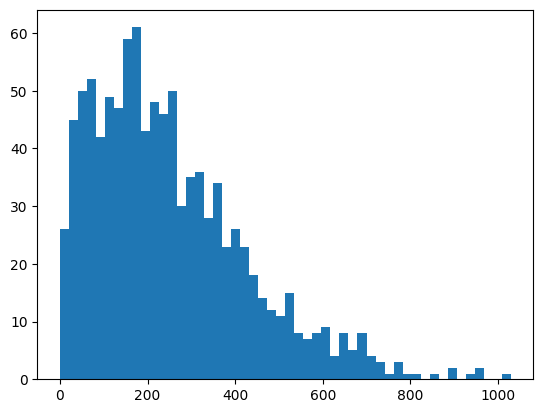

In [4]:
n = 1000
lifetimes, local = simulate_lifetimes(1000)
plt.hist(lifetimes, bins = 50)
plt.show()

In [5]:
print('Fraction of women for which the cancer reappered locally:', local / n)

Fraction of women for which the cancer reappered locally: 0.68


<h3> Task 2 </h3>

In [6]:
p0 = np.array([1,0,0,0,0])
t = 120
true_distr = p0 @ np.linalg.matrix_power(P,t)
true_distr

array([0.35902627, 0.15895604, 0.1660869 , 0.06774149, 0.2481893 ])

In [7]:
def simulate_at_t(num = 1000, t = 120):
  state = 0
  states_at_t = np.zeros(num)
  for i in range(num):
    state = 0
    for step in range(t):
      probs = P[state, :]
      new_state = np.random.choice(a = 5, size = 1, p = probs)[0]
      state = new_state
    states_at_t[i] = state
  counts = np.zeros(5)
  for i in range(5):
    counts[i] = np.sum(states_at_t == i)
  return counts
  

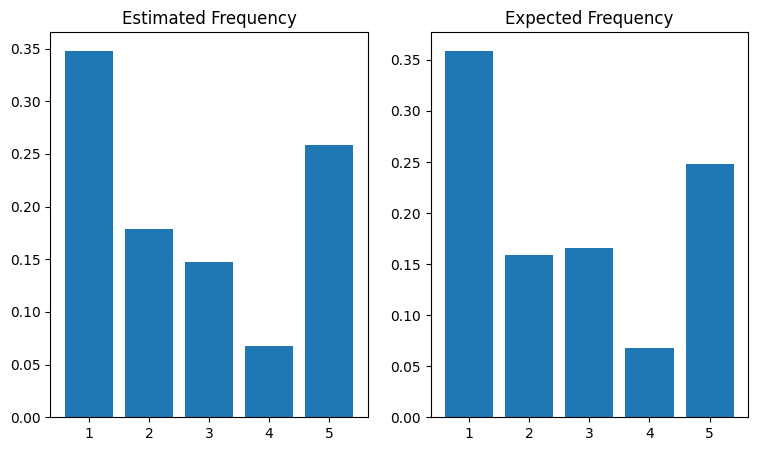

In [8]:
fig, axs = plt.subplots(1,2, figsize = (9,5))
axs[0].bar(np.arange(1,6), simulate_at_t(t = 120)/n)
axs[0].set_title('Estimated Frequency')
axs[1].bar(np.arange(1,6), true_distr)
axs[1].set_title('Expected Frequency')
plt.show()

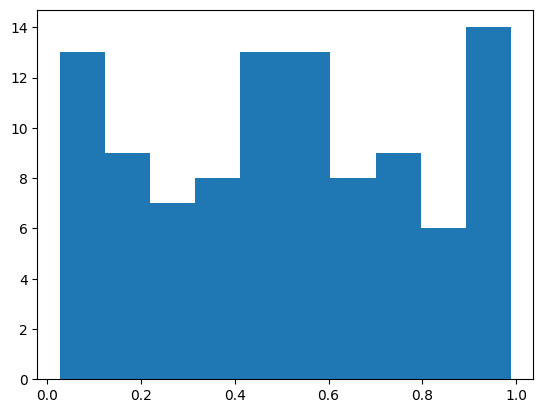

In [9]:
pvals = []
n = 1000
for i in range(100):
  pvals.append(stats.chisquare(simulate_at_t(), true_distr*n)[1])
plt.hist(pvals)
plt.show()

<h3> Task 3 </h3>

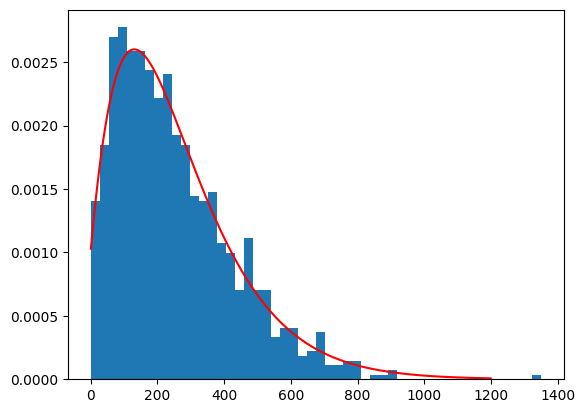

The expected lifetime starting from state 0 is: 262.3716 months
The empirical lifetime starting from state 0 is: 251.5790 months


In [10]:
def phase_type_distr(t, init):
  Ps = P[:4,:4]
  p = P[:4,4]
  return init @ (np.linalg.matrix_power(Ps, t) @ p)

def get_expected_value(init):
  Ps = P[:4,:4]
  return init @ np.linalg.inv(np.eye(4) - Ps) @ np.ones(4)

p0 = np.array([1,0,0,0])


lifetimes, _ = simulate_lifetimes(n = 1000)
plt.hist(lifetimes, bins = 50, density = True)
x = np.arange(1,1200)
y = [phase_type_distr(i, p0) for i in x]
plt.plot(x, y, color = 'r')
plt.show()
print('The expected lifetime starting from state 0 is: {:.4f} months'.format(get_expected_value(p0)))
print('The empirical lifetime starting from state 0 is: {:.4f} months'.format(np.mean(lifetimes)))

<h3> Task 4 </h3>

In [11]:
n = 1000
found = 0
lifetimes = []
while found < n:
  state = 0
  lifetime = 0
  flag_cancer = False
  
  while state != 4:
    if lifetime > 12 and flag_cancer == False:
      break
    probs = P[state, :]
    new_state = np.random.choice(a = 5, size = 1, p = probs)[0]
    if (new_state == 1 or new_state == 2 or new_state == 3) and lifetime <= 12:
      flag_cancer = True
    state = new_state
    lifetime += 1

  if (flag_cancer and lifetime > 12):
    found +=1
    if(found % 100 == 0):
      print(f'I found {found} women')
    lifetimes.append(lifetime)

I found 100 women
I found 200 women
I found 300 women
I found 400 women
I found 500 women
I found 600 women
I found 700 women
I found 800 women
I found 900 women
I found 1000 women


In [12]:
print('Expected lifetime for task 4 is {:.4f} months'.format(np.mean(lifetimes)))

Expected lifetime for task 4 is 172.1170 months


<h3> Task 5 </h3>

In [13]:
nsim = 100
women = 200
X = np.empty(nsim)
Y = np.empty(nsim) # control variate
for iter in range(nsim):
    if (iter % 10 == 0):
        print(iter)
    lifetimes, _ = simulate_lifetimes(n = women)
    X[iter] = np.sum(lifetimes <= 350)/women
    Y[iter] = np.mean(lifetimes)

#crude montecarlo
print('Crude MC: estimated number of died women: {:.8f}'.format(np.mean(X)))
print('Crude MC: variance is: {:.8f}'.format(np.var(X, ddof = 1)))

#control
c = -np.cov(X,Y)[0,1]/np.var(Y, ddof = 1)
Z = X + c *(Y - get_expected_value([1,0,0,0]))
print('Control Variates: estimated number of died women: {:.8f}'.format(np.mean(Z)))
print('Control Variates: variance is: {:.8f}'.format(np.var(Z, ddof = 1)))


0
10
20
30
40
50
60
70
80
90
Crude MC: estimated number of died women: 0.73820000
Crude MC: variance is: 0.00079471
Control Variates: estimated number of died women: 0.73640002
Control Variates: variance is: 0.00034827
